In [9]:
import joblib
joblib.__version__

'1.0.1'

In [1]:
%%writefile requirements.txt
# colabcode
fastapi
uvicorn
python-multipart
# pyngrok
kaggle

Writing requirements.txt


In [2]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 6.8 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=addec8c5646228f957088b1fd3c2e81074866c0bc6d1277f1cf7b983c17d7bff
  Stored in directory: /root/.cache/pip/wheels/9e/fc/1c/cf980e6413d3ee8e70cd8f39e2366b0f487e3e221aeb452eb0
Successfully built python-multipart


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutoshraiiiitk","key":"c1bc61f1810d1701e2c2a1d840d4a81e"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ealaxi/paysim1
!unzip /content/paysim1.zip

 98% 175M/178M [00:01<00:00, 165MB/s]
100% 178M/178M [00:01<00:00, 151MB/s]
Archive:  /content/paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [25]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
pd.set_option('display.max.columns', None)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA:

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
model_1 = joblib.load('credit_card_fraud.pkl')

KeyError: 0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.shape

(6362620, 11)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
fraud=len(df['isFraud'][df.isFraud==1])
not_fraud=len(df['isFraud'][df.isFraud==0])

arr=np.array([fraud,not_fraud])
labels = ['Not Fraudulent', 'Fraudulent']
print(f"Total Fraudulent Cases: {fraud}\nTotal Non Fraudulent Cases: {not_fraud}")

Total Fraudulent Cases: 8213
Total Non Fraudulent Cases: 6354407


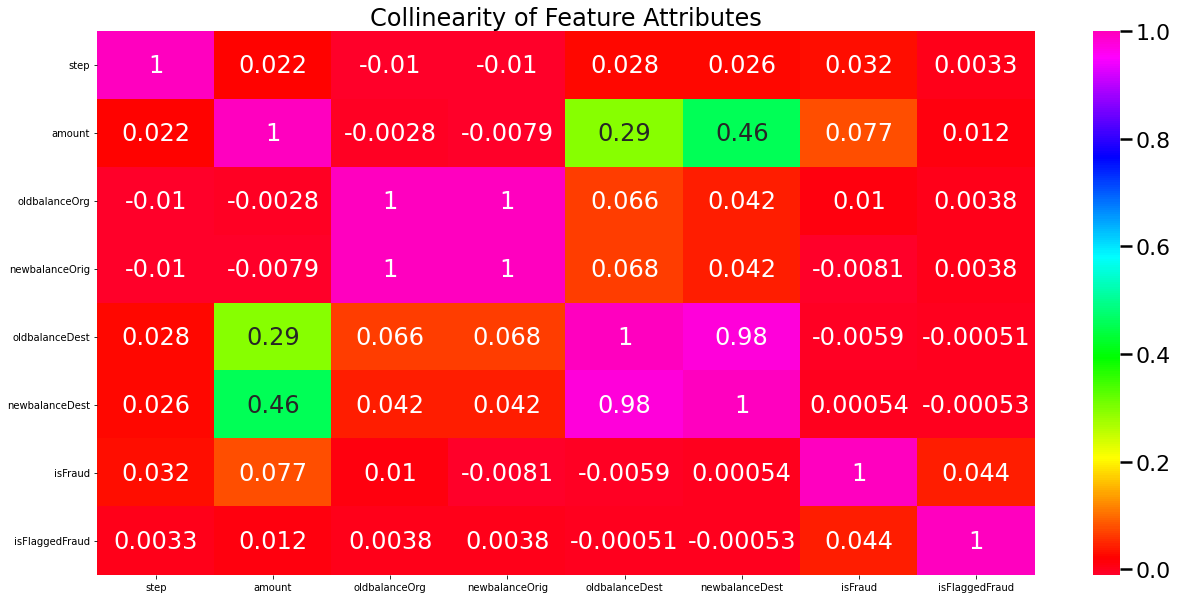

In [17]:
fig, ax = plt.subplots(figsize=(21,10))
sns.set_context('poster')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='gist_rainbow', annot = True)
ax.set_title('Collinearity of Feature Attributes')
plt.savefig('cormap.png')

In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [19]:
#@title 
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [20]:
#@title 
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [21]:
percent_fraud = (len(df.loc[df.isFraud==1])) / (len(df.loc[df.isFraud == 0])) * 100
print(f"Percentage of Fraudulent Transanctions: {percent_fraud}%")

Percentage of Fraudulent Transanctions: 0.129248881917699%


In [26]:
df.drop(['nameOrig', 'nameDest'], axis=1,inplace=True)
data=df.copy(deep=True)
categorical_cols=[col for col in data.columns if data[col].dtype=="O"]

le=LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [27]:
def evaluate(y_test, y_pred):
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"Recall Score: {recall_score(y_test, y_pred)}")
    print(f"Precision Score: {precision_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

# Data:

In [28]:
X=data.drop('isFraud', axis=1)
Y=data.isFraud

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=27)

# Models:

In [29]:
lr_clf = LogisticRegression()
rfc_clf = RandomForestClassifier(n_estimators=10)
xgb_clf = XGBClassifier(colsample_bytree = 1.0,
                        learning_rate = 0.1,
                        max_depth =4,
                        n_estimators = 200,
                        subsample = 1.0)

In [30]:
#Logistic Regression:
lr_clf.fit(X_train, Y_train)
y_preds_lr = lr_clf.predict(X_test)
evaluate(Y_test, y_preds_lr)

Accuracy Score: 0.9983421923672953
Recall Score: 0.442150744119059
Precision Score: 0.3843906510851419
F1 Score: 0.4112525117213664
Confusion Matrix:  [[1587097    1475]
 [   1162     921]]


In [31]:
#Rnadom Forest Classifier:
rfc_clf.fit(X_train, Y_train)
y_preds_rfc = rfc_clf.predict(X_test)
evaluate(Y_test, y_preds_rfc)

Accuracy Score: 0.9997038955650346
Recall Score: 0.7882861257801248
Precision Score: 0.9820574162679426
F1 Score: 0.8745672436751
Confusion Matrix:  [[1588542      30]
 [    441    1642]]


In [32]:
#XGBoost:
eval_set = [(X_test,Y_test)]
xgb_clf.fit(X_train, Y_train, early_stopping_rounds=30, eval_set=eval_set, eval_metric='logloss', verbose=True)
y_preds_xgb = xgb_clf.predict(X_test)
evaluate(Y_test, y_preds_xgb)

[13:26:38] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-logloss:0.608665
Will train until validation_0-logloss hasn't improved in 30 rounds.
[1]	validation_0-logloss:0.515906
[2]	validation_0-logloss:0.454847
[3]	validation_0-logloss:0.39967
[4]	validation_0-logloss:0.352005
[5]	validation_0-logloss:0.313321
[6]	validation_0-logloss:0.281582
[7]	validation_0-logloss:0.250393
[8]	validation_0-logloss:0.220347
[9]	validation_0-logloss:0.198778
[10]	validation_0-logloss:0.176835
[11]	validation_0-logloss:0.158267
[12]	validation_0-logloss:0.142183
[13]	validation_0-logloss:0.127404
[14]	validation_0-logloss:0.115249
[15]	validation_0-logloss:0.105001
[16]	validation_0-logloss:0.095031
[17]	validation_0-logloss:0.08567
[18]	validation_0-logloss:0.077921
[19]	validation_0-logloss:0.070096
[20]	validation_0-logloss:0.06

In [33]:
joblib.dump(rfc_clf, 'credit_card_fraud.pkl')

['credit_card_fraud.pkl']